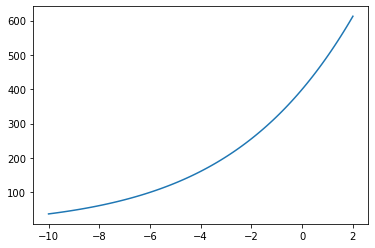

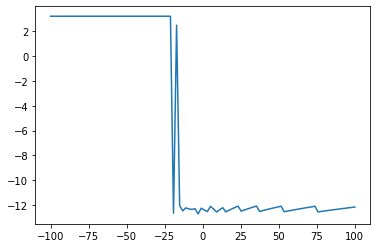

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
import scipy.optimize as opt

def f(x, a, b):
    return (x - a)**2 * np.exp(x / b)
actualAParam = 20.0
rng = np.linspace(-10.0, 2.0, 100)
output = [f(r, actualAParam, np.pi) for r in rng]

plt.plot(rng, output)


def singleParam(a):
    fitThis = lambda x, b: f(x, a, b)
    popt, pcov = curve_fit(fitThis, rng, output)
    fitData = np.array(fitThis(rng, *popt))
    diffs = (fitData - output)
    sumSquares = sum(i*i for i in diffs)
    return sumSquares

plt.figure()
across = np.linspace(-100.0, 100.0, 100)
did = []
resError = []
for i in across:
    param = actualAParam + i
    res = opt.least_squares(singleParam, [param])

    out = res.x[0]
    did.append(i)
    sqError = (out-actualAParam)**2
    resError.append(sqError)
plt.plot(did, np.log10(resError))